In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

# eda_final_project

## Duomenys

Duomenų šaltinis https://www.registrucentras.lt/p/1094. 

In [3]:
import pandas as pd
import numpy as np

In [4]:
# https://stackoverflow.com/questions/21137150/format-suppress-scientific-notation-from-pandas-aggregation-results
pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [5]:
## got an error while downloading online csv data. OSX
## quick fix
## https://stackoverflow.com/questions/50236117/scraping-ssl-certificate-verify-failed-error-for-http-en-wikipedia-org

import ssl

ssl._create_default_https_context = ssl._create_unverified_context

# Pirma dalis

### 2 
Parsisiųsti 2020 ir 2021 įmonių “Juridinių asmenų pateikti finansinės atskaitomybės dokumentai – balanso ataskaitos” ir “Juridinių asmenų pateikti finansinės atskaitomybės dokumentai – pelno (nuostolių) ataskaitos” duomenis.

In [6]:
balance_20 = pd.read_csv(
    "https://www.registrucentras.lt/aduomenys/?byla=JAR_FA_RODIKLIAI_BLNS_2020.csv"
)
balance_21 = pd.read_csv(
    "https://www.registrucentras.lt/aduomenys/?byla=JAR_FA_RODIKLIAI_BLNS_2021.csv"
)
pl_20 = pd.read_csv(
    "https://www.registrucentras.lt/aduomenys/?byla=JAR_FA_RODIKLIAI_PLNA_2020.csv"
)
pl_21 = pd.read_csv(
    "https://www.registrucentras.lt/aduomenys/?byla=JAR_FA_RODIKLIAI_PLNA_2021.csv"
)

In [7]:
balance_20.head()

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,laikotarpis_nuo,laikotarpis_iki,reg_date,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data
0,305217929,"MB ""Jantaris""",960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,BST217,BALANSAS (Neribotos civilinės atsakomybės juri...,2019-07-27,2019-12-31,2020-05-14,1610.00,NaN,0.00,1684.00,2022-12-01
1,304127368,"Alytaus neformaliojo švietimo centras ""Toleran...",630,Asociacija,0,Teisinis stat neįregistruotas,FS0323,Pelno nesiekiančių JA finansinių ataskaitų rin...,BST216,FINANSINĖS BŪKLĖS ATASKAITA,2019-01-01,2019-12-31,2020-05-25,243.00,0.00,0.00,243.00,2022-12-01
2,304759186,"Uždaroji akcinė bendrovė ""Balsana LT""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),2019-01-01,2019-12-31,2020-04-22,-20442.00,93324.00,2619.00,69759.00,2022-12-01
3,191160250,"Kretingos sporto klubas ""Žalgiris""",630,Asociacija,0,Teisinis stat neįregistruotas,FS0323,Pelno nesiekiančių JA finansinių ataskaitų rin...,BST216,FINANSINĖS BŪKLĖS ATASKAITA,2019-01-01,2019-12-31,2020-02-04,0.00,0.00,0.00,2935.00,2022-12-01
4,304512862,"UAB ""Tedėja""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),2019-01-01,2019-12-31,2020-05-05,557480.00,19462.00,406399.00,170543.00,2022-12-01


In [8]:
pl_20.head()

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,laikotarpis_nuo,laikotarpis_iki,reg_date,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos,formavimo_data
0,304781777,"UAB ""Ekorūmai""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",IST024,PELNO (NUOSTOLIŲ) ATASKAITA,2019-01-01,2019-12-31,2020-06-17,9005.00,7654.00,266206.00,2022-12-01
1,300512612,"UAB ""Peikko Lietuva""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0130,Vidutinių ir didelių įmonių finansinių ataskai...,IST024,PELNO (NUOSTOLIŲ) ATASKAITA,2019-01-01,2019-12-31,2020-06-25,1016297.00,1016297.00,34670479.00,2022-12-01
2,303052877,"UAB ""Esti projektai""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",IST023,PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa),2019-01-01,2019-12-31,2020-07-08,NaN,-6518.00,NaN,2022-12-01
3,123403470,"Uždaroji akcinė bendrovė ""POŽEMINĖS JUNGTYS""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",IST024,PELNO (NUOSTOLIŲ) ATASKAITA,2019-01-01,2019-12-31,2020-06-01,421676.00,358974.00,1994591.00,2022-12-01
4,124586163,"Uždaroji akcinė bendrovė ""Mantigus""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",IST023,PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa),2019-01-01,2019-12-31,2020-05-20,NaN,7875.00,63052.00,2022-12-01


### 3. Susipažinkite su duomenimis

In [9]:
balance_20.shape, balance_21.shape, pl_20.shape, pl_21.shape

((106318, 18), (120850, 18), (96616, 17), (110227, 17))

In [10]:
balance_20.dtypes

obj_kodas                         int64
obj_pav                          object
form_kodas                        int64
form_pav                         object
stat_statusas                     int64
stat_pav                         object
template_id                      object
template_name                    object
standard_id                      object
standard_name                    object
laikotarpis_nuo                  object
laikotarpis_iki                  object
reg_date                         object
nuosavas_kapitalas              float64
mok_sumos_ir_isipareigojimai    float64
ilgalaikis_turtas               float64
trumpalaikis_turtas             float64
formavimo_data                   object
dtype: object

In [11]:
balance_21.dtypes == balance_20.dtypes

obj_kodas                       True
obj_pav                         True
form_kodas                      True
form_pav                        True
stat_statusas                   True
stat_pav                        True
template_id                     True
template_name                   True
standard_id                     True
standard_name                   True
laikotarpis_nuo                 True
laikotarpis_iki                 True
reg_date                        True
nuosavas_kapitalas              True
mok_sumos_ir_isipareigojimai    True
ilgalaikis_turtas               True
trumpalaikis_turtas             True
formavimo_data                  True
dtype: bool

In [12]:
# Count null values
print(balance_20.isnull().sum().sum())
print(balance_21.isnull().sum().sum())
print(pl_20.isnull().sum().sum())
print(pl_21.isnull().sum().sum())

17013
24187
47606
55858


In [13]:
# Count null values
balance_21.isnull().sum(axis=0)



obj_kodas                           0
obj_pav                             0
form_kodas                          0
form_pav                            0
stat_statusas                       0
stat_pav                            0
template_id                         0
template_name                       0
standard_id                         0
standard_name                       0
laikotarpis_nuo                     0
laikotarpis_iki                     0
reg_date                            0
nuosavas_kapitalas                666
mok_sumos_ir_isipareigojimai    19670
ilgalaikis_turtas                1893
trumpalaikis_turtas              1958
formavimo_data                      0
dtype: int64

In [14]:
pl_21.isnull().sum(axis=0)


obj_kodas                         0
obj_pav                           0
form_kodas                        0
form_pav                          0
stat_statusas                     0
stat_pav                          0
template_id                       0
template_name                     0
standard_id                       0
standard_name                     0
laikotarpis_nuo                   0
laikotarpis_iki                   0
reg_date                          0
pelnas_pries_apmokestinima    34755
grynasis_pelnas                6193
pardavimo_pajamos             14910
formavimo_data                    0
dtype: int64

In [15]:
print(balance_20[balance_20.duplicated()].shape)
print(balance_21[balance_21.duplicated()].shape)
print(pl_20[pl_20.duplicated()].shape)
print(pl_21[pl_21.duplicated()].shape)

(0, 18)
(0, 18)
(0, 17)
(0, 17)


Daugiausiai nežinomų verčių turi pl_21 lentelė ir *pelnas_pries_apmokestinima* stulpelis

# Antra dalis

In [165]:
# 4. Raskite bendroves su Thermo Fisher pavadinimu
pl_20[pl_20['obj_pav'].str.contains("Thermo Fisher")].obj_pav.values

array(['UAB "Thermo Fisher Scientific Vector Senior Holdings I"',
       'UAB "Thermo Fisher Scientific Vector Holdings"',
       'UAB "Thermo Fisher Scientific Vector Senior Holdings II"',
       'UAB "Thermo Fisher Scientific Baltics"'], dtype=object)

In [16]:
# 5. Apsimeskime, kad atributas “form_pav” neegzistuoja. Iš likusių laukelių gaukite visas UAB ir MB bendroves. Palyginkite rekonstrukcijos tikslumą su “form_pav” vertėmis - kiek procentų verčių pavyko atkurti skirtingose duomenyse?
pl_21['extracted_form_pav'] = pl_21.obj_pav.str.split(" \"").str.get(0)
pl_20['extracted_form_pav'] = pl_20.obj_pav.str.split(" \"").str.get(0)
balance_20['extracted_form_pav'] = balance_20.obj_pav.str.split(" \"").str.get(0)
balance_21['extracted_form_pav'] = pl_21.obj_pav.str.split(" \"").str.get(0)

print(pl_21.extracted_form_pav.value_counts().head(40))

new_mapping = {'UAB': 'Uždaroji akcinė bendrovė', 'MB': 'Mažoji bendrija', 'Uždaroji akcinė bendrovė': 'Uždaroji akcinė bendrovė', 'Mažoji bendrija': 'Mažoji bendrija', 'UŽDAROJI AKCINĖ BENDROVĖ':'Uždaroji akcinė bendrovė'}
pl_21.extracted_form_pav = pl_21.extracted_form_pav.map(new_mapping)
pl_20.extracted_form_pav = pl_20.extracted_form_pav.map(new_mapping)
balance_20.extracted_form_pav = balance_20.extracted_form_pav.map(new_mapping)
balance_21.extracted_form_pav = balance_21.extracted_form_pav.map(new_mapping)

UAB                                                             59279
MB                                                              14957
Uždaroji akcinė bendrovė                                        10229
VšĮ                                                              1537
Individuali įmonė                                                1372
Viešoji įstaiga                                                   788
UŽDAROJI AKCINĖ BENDROVĖ                                          473
Mažoji bendrija                                                   425
Asociacija                                                        266
Akcinė bendrovė                                                   142
ŽŪB                                                               123
Kooperatinė bendrovė                                               76
Žemės ūkio kooperatyvas                                            74
Žemės ūkio bendrovė                                                64
UADBB               

In [17]:
orig_filt = pl_20[pl_20['form_pav'].isin(["Uždaroji akcinė bendrovė", "Mažoji bendrija"])]['form_pav']
extracted_filt = pl_20['extracted_form_pav'].dropna()
print(f"Share: {100*extracted_filt.shape[0]/orig_filt.shape[0]}")

orig_filt = pl_21[pl_21['form_pav'].isin(["Uždaroji akcinė bendrovė", "Mažoji bendrija"])]['form_pav']
extracted_filt = pl_21['extracted_form_pav'].dropna()
print(f"Share: {100*extracted_filt.shape[0]/orig_filt.shape[0]}")

orig_filt = balance_20[balance_20['form_pav'].isin(["Uždaroji akcinė bendrovė", "Mažoji bendrija"])]['form_pav']
extracted_filt = balance_20['extracted_form_pav'].dropna()
print(f"Share: {100*extracted_filt.shape[0]/orig_filt.shape[0]}")

orig_filt = balance_21[balance_21['form_pav'].isin(["Uždaroji akcinė bendrovė", "Mažoji bendrija"])]['form_pav']
extracted_filt = balance_21['extracted_form_pav'].dropna()
print(f"Share: {100*extracted_filt.shape[0]/orig_filt.shape[0]}")


Share: 86.46472991983565
Share: 84.17611675377182
Share: 86.46919590022999
Share: 84.17362665535977


### 6 
Apskaičiuoti vidutinias reikšmes “pelnas_pries_apmokestinima” ir “nuosavas_kapitalas” laukų kiekvienai juridinio asmens formai (Uždaroji akcinė bendrovė, Mažoji bendrija, etc.) už visą laikotarpį (2020 ir 2021 metai kartu). 

In [18]:
balance_20.form_pav.value_counts(dropna=False)

Uždaroji akcinė bendrovė                    76370
Mažoji bendrija                             13196
Asociacija                                   9073
Viešoji įstaiga                              5324
Individuali įmonė                             677
Labdaros ir paramos fondas                    598
Žemės ūkio bendrovė                           401
Kooperatinė bendrovė                          334
Akcinė bendrovė                               245
Komanditinė ūkinė bendrija                     39
Savivaldybės įmonė                             24
Užsienio juridinio asmens filialas             16
Valstybės įmonė                                13
Tikroji ūkinė bendrija                          4
Biudžetinė įstaiga                              2
Bendrija                                        1
Lietuvos prekyb.,pramon. rūmų asociacija        1
Name: form_pav, dtype: int64

In [19]:
# nuosavas_kapitalas
nuosavas_kapitalas = balance_20[["obj_kodas", "nuosavas_kapitalas"]]

In [20]:
nuosavas_kapitalas.shape

(106318, 2)

In [21]:
# form_pav,  pelnas_pries_apmokestinima
pelnas_pries_apmokestinima = pl_20[
    ["obj_kodas", "form_pav", "pelnas_pries_apmokestinima"]
]

In [22]:
pelnas_pries_apmokestinima.shape

(96616, 3)

In [23]:
balance_20_set = set(balance_20.obj_kodas)
pl_20_set = set(pl_20.obj_kodas)

len(pl_20_set.difference(balance_20_set)), len(balance_20_set.difference(pl_20_set))

(0, 8120)

In [24]:
# we take intersection and ignore companies that do not have profit loss statement.
pelnas_pries_apmokestinima.merge(nuosavas_kapitalas, on="obj_kodas", how="inner").shape

(129210, 4)

In [25]:
# we see there are duplicates !!!!

In [26]:
balance_20.obj_kodas.value_counts().iloc[:3]

168970870    16
145496790    16
135994223    15
Name: obj_kodas, dtype: int64

In [27]:
balance_20[balance_20.laikotarpis_nuo == "2019-01-01"].obj_kodas.value_counts()

304127368    1
304895492    1
302583362    1
303445421    1
124665536    1
            ..
177218596    1
151484255    1
125416121    1
302756355    1
303778867    1
Name: obj_kodas, Length: 86828, dtype: int64

In [28]:
# we filter out duplicates(?) by choosing laikotarpis_nuo == "2019-01-01". This requires inside knowledge about balance sheets.
nuosavas_kapitalas = balance_20[balance_20.laikotarpis_nuo == "2019-01-01"][
    ["obj_kodas", "nuosavas_kapitalas"]
]

In [29]:
pelnas_pries_apmokestinima = pl_20[pl_20.laikotarpis_nuo == "2019-01-01"][
    ["obj_kodas", "form_pav", "pelnas_pries_apmokestinima"]
]

In [30]:
pelnas_pries_apmokestinima.obj_kodas.value_counts()  ## no duplicates.

304781777    1
111733617    1
302794270    1
302664106    1
300506602    1
            ..
110461363    1
303336094    1
304040760    1
300572972    1
173110025    1
Name: obj_kodas, Length: 79433, dtype: int64

In [31]:
nuosavas_kapitalas.shape, pelnas_pries_apmokestinima.shape

((86828, 2), (79433, 3))

In [32]:
# we drop nan and use inner merge
merged = nuosavas_kapitalas.merge(
    pelnas_pries_apmokestinima, on="obj_kodas", how="inner"
)

In [33]:
year_20_result = merged.groupby('form_pav').agg({'obj_kodas':'count', 
                         'nuosavas_kapitalas':'mean', 
                         'pelnas_pries_apmokestinima':'mean', }).apply(round).rename(columns=dict(obj_kodas='count'))


In [34]:
year_20_result

,count,nuosavas_kapitalas,pelnas_pries_apmokestinima
form_pav,,,
Akcinė bendrovė,234,38071183.00,2949222.00
Asociacija,1984,15481.00,65.00
Biudžetinė įstaiga,2,141074.00,16242.00
Individuali įmonė,562,191930.00,19217.00
Komanditinė ūkinė bendrija,23,1442068.00,711898.00
Kooperatinė bendrovė,317,698003.00,36818.00
Labdaros ir paramos fondas,91,10945.00,141.00
"Lietuvos prekyb.,pramon. rūmų asociacija",1,64491.00,NaN
Mažoji bendrija,8562,18645.00,7669.00


In [35]:
## year 2021

In [36]:
nuosavas_kapitalas = balance_21[balance_21.laikotarpis_nuo == "2020-01-01"][
    ["obj_kodas", "nuosavas_kapitalas"]
]
pelnas_pries_apmokestinima = pl_21[pl_21.laikotarpis_nuo == "2020-01-01"][
    ["obj_kodas", "form_pav", "pelnas_pries_apmokestinima"]
]
## check for duplicates.
nuosavas_kapitalas.shape, pelnas_pries_apmokestinima.shape, len(
    set(nuosavas_kapitalas.obj_kodas)
), len(set(pelnas_pries_apmokestinima.obj_kodas))
#  No duplicates!!

((94600, 2), (86471, 3), 94600, 86471)

In [37]:
merged = nuosavas_kapitalas.merge(
    pelnas_pries_apmokestinima, on="obj_kodas", how="inner"
)
year_21_result = merged.groupby('form_pav').agg({'obj_kodas':'count', 
                         'nuosavas_kapitalas':'mean', 
                         'pelnas_pries_apmokestinima':'mean', }).apply(round).rename(columns=dict(obj_kodas='count'))


In [38]:
year_21_result

,count,nuosavas_kapitalas,pelnas_pries_apmokestinima
form_pav,,,
Akcinė bendrovė,227,44076779.00,2957779.00
Asociacija,2087,134370.00,-735.00
Individuali įmonė,554,140439.00,15009.00
Komanditinė ūkinė bendrija,29,3063515.00,365933.00
Kooperatinė bendrovė,318,771014.00,81070.00
Labdaros ir paramos fondas,104,17065.00,155.00
Mažoji bendrija,12335,20725.00,9023.00
Savivaldybės įmonė,19,3722859.00,20645.00
Tikroji ūkinė bendrija,6,173723.00,11852.00


In [41]:
merged_result = pd.concat(
    {"2020": year_20_result, "2021": year_21_result}, axis=1
).fillna(0)

In [42]:
merged_result

2020                     \
                                          count nuosavas_kapitalas   
form_pav                                                             
Akcinė bendrovė                             234        38071183.00   
Asociacija                                 1984           15481.00   
Biudžetinė įstaiga                            2          141074.00   
Individuali įmonė                           562          191930.00   
Komanditinė ūkinė bendrija                   23         1442068.00   
Kooperatinė bendrovė                        317          698003.00   
Labdaros ir paramos fondas                   91           10945.00   
Lietuvos prekyb.,pramon. rūmų asociacija      1           64491.00   
Mažoji bendrija                            8562           18645.00   
Savivaldybės įmonė                           18         3891527.00   
Tikroji ūkinė bendrija                        4          470602.00   
Uždaroji akcinė bendrovė                  64401          582191.00   
Užsienio juridinio asmens filialas           13         -296372.00   
Valstybės įmonė                              13        94670868.00   
Viešoji įstaiga                            2868           36791.00   
Žemės ūkio bendrovė                         340         1497443.00   

                                                                        2021  \
                                         pelnas_pries_apmokestinima    count   
form_pav                                                                       
Akcinė bendrovė                                          2949222.00   227.00   
Asociacija                                                    65.00  2087.00   
Biudžetinė įstaiga                                         16242.00     0.00   
Individuali įmonė                                          19217.00   554.00   
Komanditinė ūkinė bendrija                                711898.00    29.00   
Kooperatinė bendrovė                                       36818.00   318.00   
Labdaros ir paramos fondas                                   141.00   104.00   
Lietuvos prekyb.,pramon. rūmų asociacija                       0.00     0.00   
Mažoji bendrija                                             7669.00 12335.00   
Savivaldybės įmonė                                         86824.00    19.00   
Tikroji ūkinė bendrija                                   -103957.00     6.00   
Uždaroji akcinė bendrovė                                  109280.00 67280.00   
Užsienio juridinio asmens filialas                         98792.00    14.00   
Valstybės įmonė                                          5804726.00    13.00   
Viešoji įstaiga                                             9029.00  3136.00   
Žemės ūkio bendrovė                                        44135.00   349.00   

                                                             \
                                         nuosavas_kapitalas   
form_pav                                                      
Akcinė bendrovė                                 44076779.00   
Asociacija                                        134370.00   
Biudžetinė įstaiga                                     0.00   
Individuali įmonė                                 140439.00   
Komanditinė ūkinė bendrija                       3063515.00   
Kooperatinė bendrovė                              771014.00   
Labdaros ir paramos fondas                         17065.00   
Lietuvos prekyb.,pramon. rūmų asociacija               0.00   
Mažoji bendrija                                    20725.00   
Savivaldybės įmonė                               3722859.00   
Tikroji ūkinė bendrija                            173723.00   
Uždaroji akcinė bendrovė                          785954.00   
Užsienio juridinio asmens filialas               -173293.00   
Valstybės įmonė                                 87544165.00   
Viešoji įstaiga                                    41667.00   
Žemės ūkio bendrovė                              1672066.

# 3
Atrinkti UAB ir MB įmones, kurių “nuosavas_kapitalas” buvo didesnis negu nuosavo kapitalo mediana už visą laitotarpį (2020 ir 2021 metai kartu). 

In [43]:
uab_condition_21 = balance_21.form_pav == "Uždaroji akcinė bendrovė"
uab_condition_20 = balance_20.form_pav == "Uždaroji akcinė bendrovė"
laikotarpis_condition_21 = balance_21.laikotarpis_nuo == "2020-01-01"
laikotarpis_condition_20 = balance_20.laikotarpis_nuo == "2019-01-01"

capital_median_21 = balance_21[laikotarpis_condition_21 & uab_condition_21][
    ["obj_kodas", "nuosavas_kapitalas"]
].nuosavas_kapitalas.median()

capital_median_20 = balance_20[laikotarpis_condition_20 & uab_condition_20][
    ["obj_kodas", "nuosavas_kapitalas"]
].nuosavas_kapitalas.median()

In [44]:
capital_median_20, capital_median_21

(27739.0, 31843.0)

In [45]:
balance_20[
    laikotarpis_condition_20
    & uab_condition_20
    & (balance_20.nuosavas_kapitalas > capital_median_20)
].sort_values(by="nuosavas_kapitalas").tail(5)

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,laikotarpis_nuo,laikotarpis_iki,reg_date,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data,extracted_form_pav
92897,302489393,"UAB ""ME investicija""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0130,Vidutinių ir didelių įmonių finansinių ataskai...,BST123,BALANSAS,2019-01-01,2019-12-31,2020-06-05,382319766.00,112754219.00,270807863.00,225068719.00,2022-12-01,Uždaroji akcinė bendrovė
90259,126168458,LEKSITA UAB,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0518,Atskirosios finansinės būklės ataskaitos duomenys,BST210,BALANSAS,2019-01-01,2019-12-31,2020-05-21,556159000.00,NaN,325576000.00,230696000.00,2022-12-01,NaN
10090,122351387,"UAB ""Thermo Fisher Scientific Baltics""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0130,Vidutinių ir didelių įmonių finansinių ataskai...,BST123,BALANSAS,2019-01-01,2019-12-31,2020-05-25,835363488.00,40745829.00,102710566.00,775439119.00,2022-12-01,Uždaroji akcinė bendrovė
6544,301066547,MAXIMA GRUPĖ UAB,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0518,Atskirosios finansinės būklės ataskaitos duomenys,BST210,BALANSAS,2019-01-01,2019-12-31,2020-05-04,1459354000.00,NaN,1803817000.00,10401000.00,2022-12-01,NaN
75917,302608755,"Uždaroji akcinė bendrovė ""Vilniaus prekyba""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0518,Atskirosios finansinės būklės ataskaitos duomenys,BST210,BALANSAS,2019-01-01,2019-12-31,2020-05-12,1658114000.00,NaN,1777890000.00,96465000.00,2022-12-01,Uždaroji akcinė bendrovė


In [46]:
balance_21[
    laikotarpis_condition_21
    & uab_condition_21
    & (balance_21.nuosavas_kapitalas > capital_median_21)
].sort_values(by="nuosavas_kapitalas").tail(5)

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,laikotarpis_nuo,laikotarpis_iki,reg_date,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data,extracted_form_pav
119613,301066547,MAXIMA GRUPĖ UAB,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0518,Atskirosios finansinės būklės ataskaitos duomenys,BST210,BALANSAS,2020-01-01,2020-12-31,2021-04-16,1564631000.00,NaN,1987892000.00,18226000.00,2022-12-01,NaN
39828,302608755,"Uždaroji akcinė bendrovė ""Vilniaus prekyba""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0518,Atskirosios finansinės būklės ataskaitos duomenys,BST210,BALANSAS,2020-01-01,2020-12-31,2021-05-20,1950511000.00,NaN,1754522000.00,199991000.00,2022-12-01,NaN
16978,305115956,"UAB ""Thermo Fisher Scientific Vector Senior Ho...",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),2020-01-01,2020-12-31,2021-05-31,2950792636.00,1146557923.00,4097345678.00,4881.00,2022-12-01,Mažoji bendrija
25845,305115970,"UAB ""Thermo Fisher Scientific Vector Senior Ho...",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),2020-01-01,2020-12-31,2021-05-31,3898038337.00,11480.00,3898047436.00,2381.00,2022-12-01,NaN
54243,305115931,"UAB ""Thermo Fisher Scientific Vector Holdings""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),2020-01-01,2020-12-31,2021-05-31,3898038496.00,9062.00,3898045213.00,2345.00,2022-12-01,NaN


In [47]:
# Įvertinkite kurios įmonės išsiskiria ypač didele “nuosavas_kapitalas” verte (patenka į 99th percentilę)
balance_21.nuosavas_kapitalas.describe(percentiles=[0.25, 0.5, 0.75, 0.99])
balance_21[balance_21.nuosavas_kapitalas > 6364687.99][['obj_pav', 'nuosavas_kapitalas']].sort_values("nuosavas_kapitalas", ascending=False)[:10]

,obj_pav,nuosavas_kapitalas
54243,"UAB ""Thermo Fisher Scientific Vector Holdings""",3898038496.00
25845,"UAB ""Thermo Fisher Scientific Vector Senior Ho...",3898038337.00
16978,"UAB ""Thermo Fisher Scientific Vector Senior Ho...",2950792636.00
62819,Valstybės įmonė Lietuvos automobilių kelių dir...,2693140000.00
39828,"Uždaroji akcinė bendrovė ""Vilniaus prekyba""",1950511000.00
74818,"AB ""Ignitis grupė""",1812955000.00
119613,MAXIMA GRUPĖ UAB,1564631000.00
46428,"UAB ""Thermo Fisher Scientific Baltics""",1240837546.00
93471,"Akcinė bendrovė ""Lietuvos geležinkeliai""",1114799000.00
94826,"AB ""LTG Infra""",679799000.00


### 8. 
Įvertinkite kurios įmonės išsiskiria ypač didele “nuosavas_kapitalas” verte (patenka į 99th percentilę). Patikrinkite įmonių patenkančių į TOP-10 vertes rekvizitai.vz.lt svetainėje. Ranka įrašomi duomenys sukuria klaidos galimybę. Ar yra bendrovė, kurios “nuosavas_kapitalas” jums kelia įtarimų?

In [53]:
# Įvertinkite kurios įmonės išsiskiria ypač didele “nuosavas_kapitalas” verte (patenka į 99th percentilę)
balance_20.nuosavas_kapitalas.describe(percentiles=[0.25, 0.5, 0.75, 0.99])
balance_20[balance_20.nuosavas_kapitalas > balance_20.nuosavas_kapitalas.describe(percentiles=[0.25, 0.5, 0.75, 0.99])['99%']][['obj_pav', 'nuosavas_kapitalas']].sort_values("nuosavas_kapitalas", ascending=False)[:10]

,obj_pav,nuosavas_kapitalas
75917,"Uždaroji akcinė bendrovė ""Vilniaus prekyba""",1658114000.00
6544,MAXIMA GRUPĖ UAB,1459354000.00
20518,"UAB ""Thermo Fisher Scientific Vector Senior Ho...",1340595977.00
1951,"UAB ""Thermo Fisher Scientific Vector Holdings""",1340595948.00
69197,"AB ""Ignitis grupė""",1329401000.00
6784,"Akcinė bendrovė ""Lietuvos geležinkeliai""",1135504000.00
10090,"UAB ""Thermo Fisher Scientific Baltics""",835363488.00
89942,"AB ""LTG Infra""",672272000.00
50458,"AB ""Energijos skirstymo operatorius""",663917000.00
90259,LEKSITA UAB,556159000.00


### 9.
Vizualiai atvaizduoti juridinių asmenų formos pasiskirstymą per visą laikotarpį (2020 ir 2021 metais kartu). 

In [54]:
b20 = (
    balance_20.groupby("form_pav", as_index=False)
    .form_kodas.count()
    .rename(columns={"form_kodas": "2020_count"})
)

In [55]:
b21 = (
    balance_21.groupby("form_pav", as_index=False)
    .form_kodas.count()
    .rename(columns={"form_kodas": "2021_count"})
)

In [70]:
data = b20.merge(b21, on="form_pav", how="outer").fillna(0)

In [72]:
data

,form_pav,2020_count,2021_count
0,Akcinė bendrovė,245,238.00
1,Asociacija,9073,9841.00
2,Bendrija,1,0.00
3,Biudžetinė įstaiga,2,0.00
4,Individuali įmonė,677,1372.00
5,Komanditinė ūkinė bendrija,39,60.00
6,Kooperatinė bendrovė,334,348.00
7,Labdaros ir paramos fondas,598,730.00
8,"Lietuvos prekyb.,pramon. rūmų asociacija",1,0.00
9,Mažoji bendrija,13196,19185.00


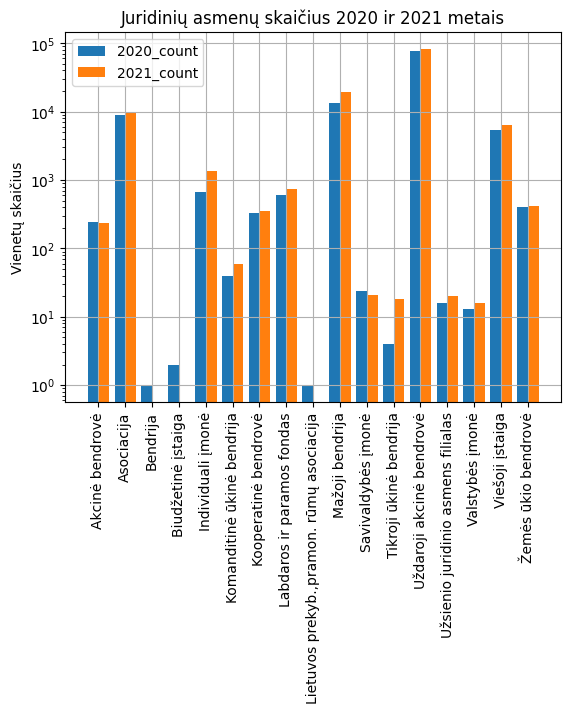

In [83]:
# With matplotlib

import matplotlib.pyplot as plt

X_axis = np.arange(data.shape[0])
  
plt.bar(X_axis - 0.2, data['2020_count'], 0.4, label = '2020_count')
plt.bar(X_axis + 0.2, data['2021_count'], 0.4, label = '2021_count')

plt.grid()
plt.yscale('log')
plt.xticks(X_axis, data['form_pav'], rotation = 90)
plt.ylabel("Vienetų skaičius")
plt.title("Juridinių asmenų skaičius 2020 ir 2021 metais")
plt.legend()
plt.show()

<AxesSubplot: title={'center': 'Juridinių asmenų skaičius 2020 ir 2021 metais'}, xlabel='form_pav', ylabel='Vienetų skaičius'>

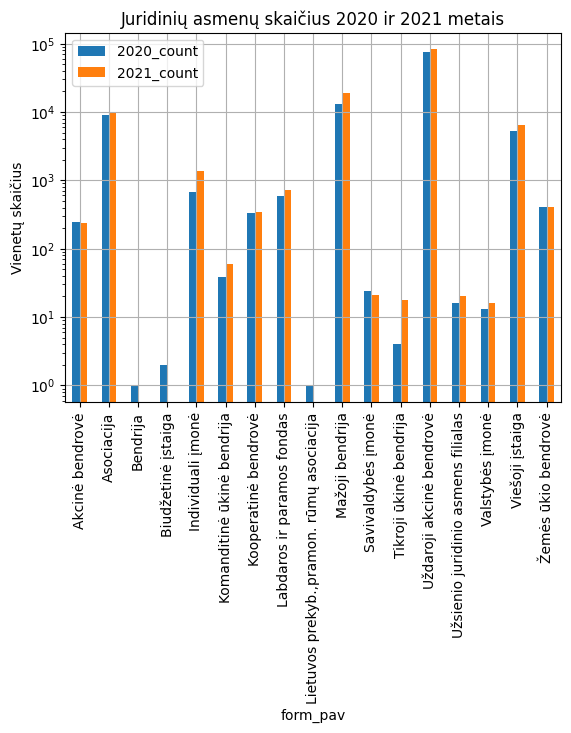

In [82]:
# With pandas
data.set_index('form_pav').plot(kind='bar', ylabel='Vienetų skaičius', logy=True, grid=True, xlabel=None, title='Juridinių asmenų skaičius 2020 ir 2021 metais')

In [ ]:
# seaborn
import seaborn as sns
data_melted =  data.melt(id_vars='form_pav')

ax = sns.barplot(data=data_melted, x='form_pav', y='value', hue='variable', orient='v')
ax.set_yscale("log")
ax.set_ylabel("Vienetų skaičius")
ax.set_title("Juridinių asmenų skaičius 2020 ir 2021 metais")
plt.grid()
plt.xticks(rotation=90)

In [57]:
b20.merge(b21, on="form_pav", how="outer")

,form_pav,2020_count,2021_count
0,Akcinė bendrovė,245,238.00
1,Asociacija,9073,9841.00
2,Bendrija,1,NaN
3,Biudžetinė įstaiga,2,NaN
4,Individuali įmonė,677,1372.00
5,Komanditinė ūkinė bendrija,39,60.00
6,Kooperatinė bendrovė,334,348.00
7,Labdaros ir paramos fondas,598,730.00
8,"Lietuvos prekyb.,pramon. rūmų asociacija",1,NaN
9,Mažoji bendrija,13196,19185.00


In [93]:
import seaborn as sns

<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='form_pav', ylabel='2020_count'>

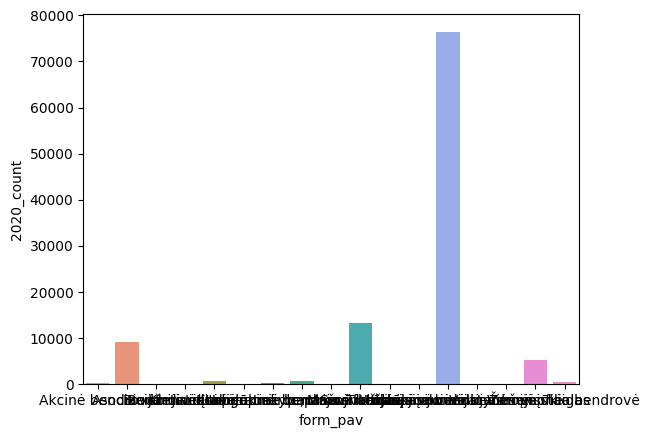

<IPython.core.display.Javascript object>

In [95]:
sns.barplot(data=b20, x="form_pav", y="2020_count")

### 10. Kurį mėnesį buvo įregistruota daugiausiai juridinių asmenų 2020 ir 2021 metais?


In [167]:
balance_20['reg_menesis'] = balance_20['reg_date'].str.split('-').str.get(1)
balance_21['reg_menesis'] = balance_21['reg_date'].str.split('-').str.get(1)


year_2020 = balance_20.groupby(by='reg_menesis').count()['obj_kodas']
year_2021 = balance_21.groupby(by='reg_menesis').count()['obj_kodas']

<AxesSubplot: xlabel='reg_menesis'>

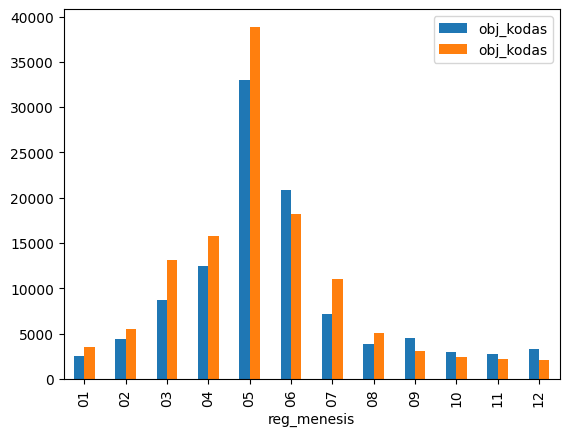

In [170]:
pd.concat([year_2020, year_2021], axis=1).plot(kind='bar')

### 11. Vizualiai atvaizduoti juridinių asmenų statuso pasiskirstymą kiekvienais metais (2020 ir 2021 metais kartu).

Check exercice 9 with stat_statusas feature.

### 12  Kiekvienai įmonei apskaičiuoti tendenciją. Jei “grynasis_pelnas” + “nuosavas_kapitalas” 2021 metais buvo didesnis už 2020 metais deklaruotą, tai tendencija “teigiama”, jei ne - “neigiama”. Atvaizduoti tendencijos duomenis stulpelinėje diagramoje.

In [106]:
tend_20 = pl_20[["obj_kodas", "form_pav", "grynasis_pelnas"]].merge(
    balance_20[["obj_kodas", "nuosavas_kapitalas"]]
)

<IPython.core.display.Javascript object>

In [107]:
tend_20["value_20"] = tend_20["grynasis_pelnas"] + tend_20["nuosavas_kapitalas"]
tend_20 = tend_20[["obj_kodas", "form_pav", "value_20"]]

<IPython.core.display.Javascript object>

In [111]:
tend_21 = pl_21[["obj_kodas", "form_pav", "grynasis_pelnas"]].merge(
    balance_21[["obj_kodas", "nuosavas_kapitalas"]]
)
tend_21["value_21"] = tend_21["grynasis_pelnas"] + tend_21["nuosavas_kapitalas"]
tend_21 = tend_21[["obj_kodas", "value_21"]]

<IPython.core.display.Javascript object>

In [113]:
tend = tend_20.merge(tend_21, on="obj_kodas")

<IPython.core.display.Javascript object>

In [115]:
tend["tendencija"] = "neigiama"

<IPython.core.display.Javascript object>

In [117]:
tend.loc[tend.value_21 > tend.value_20, "tendencija"] = "teigiama"

<IPython.core.display.Javascript object>

In [120]:
tend.tendencija.value_counts()

teigiama    59334
neigiama    56351
Name: tendencija, dtype: int64

<IPython.core.display.Javascript object>

# 13
Surasti UAB ir MB įmones, kurios 2020 vykdė veiklą, o 2021 - bankrutavo. Bankrutavusių įmonių statusai: “Bankrutavęs”, “Bankrutuojantis”, “Išregistruotas”, “Inicijuojamas likvidavimas”, “Likviduojamas”, “Likviduojamas dėl bankroto”. Toliau veiklą vykdanti įmonė pažymėta "Teisinis stat neįregistruotas" statusu. Kokia bankrutavusių įmonių “nuosavas_kapitalas”suma 2021 metais? Kokia bankrutavusių įmonių “grynasis_pelnas” suma 2021 metais? Palyginti šias sumas su veikiančių įmonių atitinkamomis sumomis.

In [ ]:
# dirbame tik su MB ir UAB
## veikianti imone = 'Teisinis stat neįregistruotas'
## Bankrutavusi imone = 'Bankrutavęs', 'Bankrutuojantis', 'Išregistruotas', 'Likviduojamas', 'Likviduojamas dėl bankroto', 'Inicijuojamas likvidavimas'

In [63]:
def get_veikianti_bankrutavusi(x):
    veikianti = "Teisinis stat neįregistruotas"
    bankrutavusi = [
        "Bankrutavęs",
        "Bankrutuojantis",
        "Išregistruotas",
        "Likviduojamas",
        "Likviduojamas dėl bankroto",
        "Inicijuojamas likvidavimas",
    ]
    if x == veikianti:
        return "veikianti"
    elif x in bankrutavusi:
        return "bankrutavusi"
    return np.nan


balance_20["veikianti_bankrutavusi"] = balance_20.stat_pav.map(
    get_veikianti_bankrutavusi
)
balance_21["veikianti_bankrutavusi"] = balance_21.stat_pav.map(
    get_veikianti_bankrutavusi
)

In [64]:
bal_cols = ["obj_kodas", "form_pav", "veikianti_bankrutavusi", "nuosavas_kapitalas"]
pl_cols = ["obj_kodas", "grynasis_pelnas"]
merge_on = "obj_kodas"
mb_uab = ["Mažoji bendrija", "Uždaroji akcinė bendrovė"]
uab_mb_codition_20 = balance_20.form_pav.isin(mb_uab)
uab_mb_codition_21 = balance_21.form_pav.isin(mb_uab)

merged_20 = balance_20[uab_mb_codition_20][bal_cols].merge(pl_20[pl_cols], on=merge_on)
merged_21 = balance_21[uab_mb_codition_21][bal_cols].merge(pl_21[pl_cols], on=merge_on)

In [65]:
merged = merged_20.merge(merged_21, on=merge_on, suffixes=["_20", "_21"], how="left")

In [66]:
merged.veikianti_bankrutavusi_20.value_counts(), merged.veikianti_bankrutavusi_21.value_counts(),

(veikianti       125594
 bankrutavusi      8501
 Name: veikianti_bankrutavusi_20, dtype: int64,
 veikianti       105849
 bankrutavusi      3906
 Name: veikianti_bankrutavusi_21, dtype: int64)

In [67]:
veikianti_bankrutavusi_codition = merged.apply(
    lambda x: (x["veikianti_bankrutavusi_20"] == "veikianti")
    & (x["veikianti_bankrutavusi_21"] == "bankrutavusi"),
    axis=1,
)

In [68]:
merged[
    merged.veikianti_bankrutavusi_21 == "bankrutavusi"
].veikianti_bankrutavusi_20.value_counts()

bankrutavusi    3906
Name: veikianti_bankrutavusi_20, dtype: int64

In [69]:
## Nera bankrutavusiu imoniu?!

# 14
Sukurti naują stulpelį “turtas”, kuris skaičiuojamas sudedant “trumpalaikis_turtas” ir “ilgalaikis_turtas”.

In [70]:
balance_20["turtas"] = (
    balance_20["trumpalaikis_turtas"] + balance_20["ilgalaikis_turtas"]
)

balance_21["turtas"] = (
    balance_21["trumpalaikis_turtas"] + balance_21["ilgalaikis_turtas"]
)

Suskirstyti įmones į 5 grupes pagal lauką “turtas”. Palyginti kaip šios grupės keičiasi 2020 ir 2021 metais. Palyginimą atvaizduoti grafiškai.

In [132]:
balance_20.turtas.describe(percentiles=[0.2, 0.4, 0.6, 0.8])

count       104879.00
mean       1082727.26
std       20989512.86
min        -132771.00
20%           2965.00
40%          18960.20
50%          36421.00
60%          68112.20
80%         278432.60
max     3088980000.00
Name: turtas, dtype: float64

<IPython.core.display.Javascript object>

In [71]:
balance_20["turtas_category"] = pd.cut(
    balance_20.turtas,
    bins=[0, 3000, 20000, 35000, 70000, 3_000_000_000],
    labels=["iki 3k", "3k-20k", "20k-35k", "35k-70k", "70k+"],
)

In [72]:
balance_21["turtas_category"] = pd.cut(
    balance_21.turtas,
    bins=[0, 3000, 20000, 35000, 70000, 3_000_000_000],
    labels=["iki 3k", "3k-20k", "20k-35k", "35k-70k", "70k+"],
)

In [73]:
b20 = (
    balance_20[["obj_kodas", "turtas_category"]]
    .copy()
    .rename(columns={"turtas_category": "turtas_category_2020"})
)

In [74]:
b21 = (
    balance_21[["obj_kodas", "turtas_category"]]
    .copy()
    .rename(columns={"turtas_category": "turtas_category_2021"})
)

In [77]:
turtas = b20.merge(b21, on="obj_kodas")
turtas.head()

,obj_kodas,turtas_category_2020,turtas_category_2021
0,305217929,iki 3k,iki 3k
1,304127368,iki 3k,iki 3k
2,304759186,70k+,35k-70k
3,191160250,iki 3k,iki 3k
4,304512862,70k+,70k+


In [ ]:
## palyginimas -> count'as 
## judejimas is vienos kategorijos i kita 

In [111]:
s_2021

20k-35k     7975
iki 3k     10588
35k-70k    10753
3k-20k     17569
70k+       41515
Name: turtas_category_2021, dtype: int64

In [116]:
pd.concat([s_2020, s_2021],axis=1)

,turtas_category_2020,turtas_category_2021
70k+,38527,41515
3k-20k,18614,17569
iki 3k,12957,10588
35k-70k,10343,10753
20k-35k,7935,7975


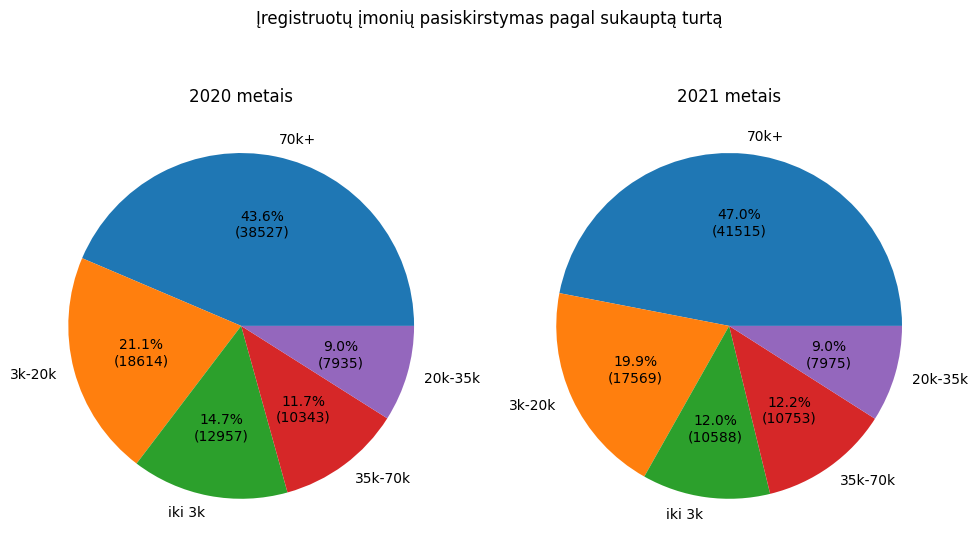

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

s_2020 = turtas['turtas_category_2020'].value_counts()
s_2021= turtas['turtas_category_2021'].value_counts()
s = pd.concat([s_2020, s_2021],axis=1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

ax[0].pie(s['turtas_category_2020'],labels = s.index, autopct=autopct_format(s['turtas_category_2020']))
ax[0].set_title("2020 metais")
ax[1].pie(s['turtas_category_2021'],labels = s.index, autopct=autopct_format(s['turtas_category_2021']))
ax[1].set_title("2021 metais")
plt.suptitle("Įregistruotų įmonių pasiskirstymas pagal sukauptą turtą", y=0.80)
plt.tight_layout()
plt.show()



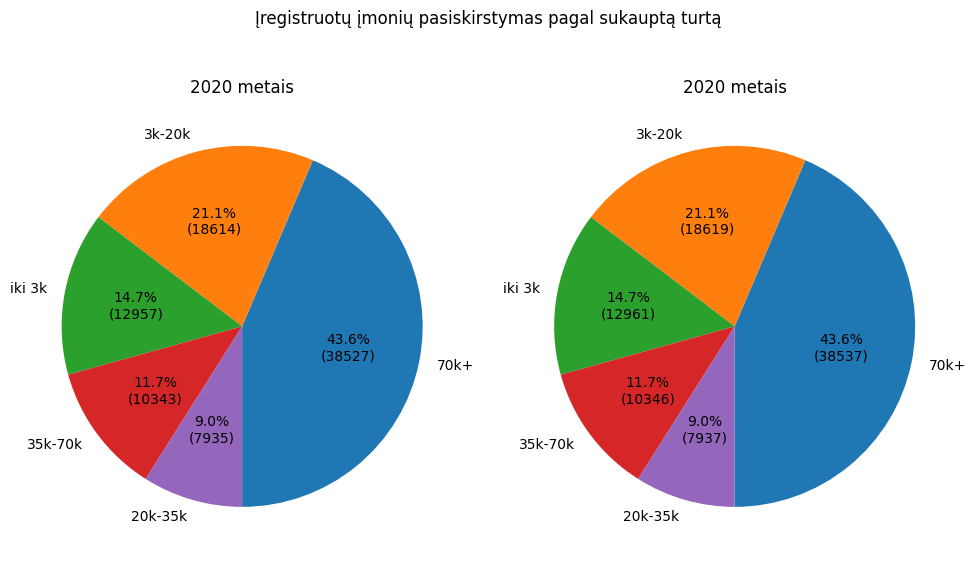

In [143]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

s.plot(ax=ax[0], y='turtas_category_2020', kind='pie',
         autopct=autopct_format(s['turtas_category_2020']), startangle=270, title="2020 metais", legend=None)
ax[0].axis('off')

s.plot(ax=ax[1], y='turtas_category_2020', kind='pie',
         autopct=autopct_format(s['turtas_category_2021']), startangle=270, legend=None, title="2020 metais")
ax[1].axis('off')

plt.suptitle("Įregistruotų įmonių pasiskirstymas pagal sukauptą turtą", y=0.80)
plt.tight_layout()
plt.show()


# 15
Surasti top100 pelningiausias įmones pagal “grynasis pelnas” ir top100 įmones kurių “nuosavas kapitalas” didžiausias. Ar yra sutampančių įmonių šiuose sąrašuose? Skaičiuojant topus imti viso laikotarpio įmones.

In [144]:
mb_uab = ["Mažoji bendrija", "Uždaroji akcinė bendrovė"]
uab_mb_codition_20 = balance_20.form_pav.isin(mb_uab)
uab_mb_codition_21 = balance_21.form_pav.isin(mb_uab)

laikotarpis_condition_20 = balance_20.laikotarpis_nuo == "2019-01-01"
laikotarpis_condition_21 = balance_21.laikotarpis_nuo == "2020-01-01"


bal_cols = ["obj_kodas", "obj_pav", "form_pav", "nuosavas_kapitalas"]

In [145]:
top_capital_20 = (
    balance_20[uab_mb_codition_20 & laikotarpis_condition_20][bal_cols]
    .sort_values("nuosavas_kapitalas", ascending=False)
    .dropna()
    .head(100)
)

In [155]:
top_capital_21.head()

,obj_kodas,obj_pav,form_pav,nuosavas_kapitalas
54243,305115931,"UAB ""Thermo Fisher Scientific Vector Holdings""",Uždaroji akcinė bendrovė,3898038496.00
25845,305115970,"UAB ""Thermo Fisher Scientific Vector Senior Ho...",Uždaroji akcinė bendrovė,3898038337.00
16978,305115956,"UAB ""Thermo Fisher Scientific Vector Senior Ho...",Uždaroji akcinė bendrovė,2950792636.00
39828,302608755,"Uždaroji akcinė bendrovė ""Vilniaus prekyba""",Uždaroji akcinė bendrovė,1950511000.00
119613,301066547,MAXIMA GRUPĖ UAB,Uždaroji akcinė bendrovė,1564631000.00


In [146]:
top_capital_21 = (
    balance_21[uab_mb_codition_21 & laikotarpis_condition_21][bal_cols]
    .sort_values("nuosavas_kapitalas", ascending=False)
    .dropna()
    .head(100)
)

In [147]:
mb_uab = ["Mažoji bendrija", "Uždaroji akcinė bendrovė"]
pl_uab_mb_codition_20 = pl_20.form_pav.isin(mb_uab)
pl_uab_mb_codition_21 = pl_21.form_pav.isin(mb_uab)

pl_laikotarpis_condition_20 = pl_20.laikotarpis_nuo == "2019-01-01"
pl_laikotarpis_condition_21 = pl_20.laikotarpis_nuo == "2020-01-01"


pl_cols = ["obj_kodas", "obj_pav", "form_pav", "grynasis_pelnas"]

In [148]:
top_profit_20 = (
    pl_20[pl_uab_mb_codition_20 & pl_laikotarpis_condition_20][pl_cols]
    .sort_values("grynasis_pelnas", ascending=False)
    .dropna()
    .head(100)
)

In [149]:
top_profit_21 = (
    pl_21[pl_uab_mb_codition_21 & pl_laikotarpis_condition_21][pl_cols]
    .sort_values("grynasis_pelnas", ascending=False)
    .dropna()
    .head(100)
)

In [150]:
top_profit_21

,obj_kodas,obj_pav,form_pav,grynasis_pelnas
56566,121411842,"Uždaroji akcinė bendrovė ""RIVILĖ""",Uždaroji akcinė bendrovė,1029987.00
27806,304437648,UAB GTV Investments,Uždaroji akcinė bendrovė,986852.00
71582,110199943,"UAB ""ALSO Lietuva""",Uždaroji akcinė bendrovė,973000.00
8679,303832418,"UAB ""Limoja""",Uždaroji akcinė bendrovė,278149.00
28800,301879586,"UAB ""Baltesa""",Uždaroji akcinė bendrovė,220807.00
...,...,...,...,...
61174,303543552,"UAB ""Consultada""",Uždaroji akcinė bendrovė,-261.00
79486,300670758,"UAB ""Vinorda""",Uždaroji akcinė bendrovė,-341.00
15721,304474479,"UAB ""Statinių statybos valdymas""",Uždaroji akcinė bendrovė,-466.00
70573,305638725,"MB ""Grilinta""",Mažoji bendrija,-613.00


In [151]:
best_20 = top_capital_20.merge(top_profit_20, on="obj_kodas")

In [152]:
best_21 = top_capital_21.merge(top_profit_21, on="obj_kodas")

In [153]:
best_20

,obj_kodas,obj_pav_x,form_pav_x,nuosavas_kapitalas,obj_pav_y,form_pav_y,grynasis_pelnas
0,122351387,"UAB ""Thermo Fisher Scientific Baltics""",Uždaroji akcinė bendrovė,835363488.00,"UAB ""Thermo Fisher Scientific Baltics""",Uždaroji akcinė bendrovė,246597137.00
1,302489393,"UAB ""ME investicija""",Uždaroji akcinė bendrovė,382319766.00,"UAB ""ME investicija""",Uždaroji akcinė bendrovė,65718272.00
2,111660489,UAB Teva Baltics,Uždaroji akcinė bendrovė,360041379.00,UAB Teva Baltics,Uždaroji akcinė bendrovė,40401074.00
3,123033512,MAXIMA LT UAB,Uždaroji akcinė bendrovė,264546000.00,MAXIMA LT UAB,Uždaroji akcinė bendrovė,83641000.00
4,110688998,"UAB ""Bitė Lietuva""",Uždaroji akcinė bendrovė,252973000.00,"UAB ""Bitė Lietuva""",Uždaroji akcinė bendrovė,33429000.00
5,126142011,"Uždaroji akcinė bendrovė ""NEO GROUP""",Uždaroji akcinė bendrovė,225969009.00,"Uždaroji akcinė bendrovė ""NEO GROUP""",Uždaroji akcinė bendrovė,24270205.00
6,111471645,"UAB ""TELE2""",Uždaroji akcinė bendrovė,181159000.00,"UAB ""TELE2""",Uždaroji akcinė bendrovė,56625000.00
7,156673480,"UAB koncernas ""ACHEMOS GRUPĖ""",Uždaroji akcinė bendrovė,180519000.00,"UAB koncernas ""ACHEMOS GRUPĖ""",Uždaroji akcinė bendrovė,20122000.00
8,234376520,"Uždaroji akcinė bendrovė ""Kesko Senukai Lithua...",Uždaroji akcinė bendrovė,153243537.00,"Uždaroji akcinė bendrovė ""Kesko Senukai Lithua...",Uždaroji akcinė bendrovė,18683361.00
9,111543781,"Uždaroji akcinė bendrovė ""BALTISCHES HAUS""",Uždaroji akcinė bendrovė,147498367.00,"Uždaroji akcinė bendrovė ""BALTISCHES HAUS""",Uždaroji akcinė bendrovė,11654436.00


In [171]:
len(set(top_profit_20.obj_kodas).intersection(set(top_capital_20.obj_kodas)))

39

In [154]:
set(top_profit_21.obj_kodas).intersection(set(top_capital_21.obj_kodas))

set()

# 16
Ar topai iš 9 užduoties skiriasi 2020 ir 2021 metais? Kurios įmonės iškrenta iš topų 2021 metais?

In [166]:
capital_drop_outs_21 = []
for i in top_capital_20.obj_pav:
    if i not in top_capital_21.obj_pav:
        capital_drop_outs_21.append(i)

In [167]:
capital_drop_outs_21

['Uždaroji akcinė bendrovė "Vilniaus prekyba"',
 'MAXIMA GRUPĖ UAB',
 'UAB "Thermo Fisher Scientific Baltics"',
 'LEKSITA UAB',
 'UAB "ME investicija"',
 'EUROAPOTHECA UAB',
 'NVP PROJEKTAI UAB',
 'PATRIA HOLDINGS UAB',
 'ENTARAS UAB',
 'UAB Teva Baltics',
 'MAXIMA LT UAB',
 'UAB "Bitė Lietuva"',
 'OZO TURTAS UAB',
 'Uždaroji akcinė bendrovė "NEO GROUP"',
 'VISAS UAB',
 'UAB "TELE2"',
 'GALIO GROUP UAB',
 'UAB koncernas "ACHEMOS GRUPĖ"',
 'UAB "EPSO-G"',
 '"Swedbank lizingas" UAB',
 'UAB "Lag&d"',
 'TAIKOS TURTAS UAB',
 'UAB "ICOR"',
 'Uždaroji akcinė bendrovė "Kesko Senukai Lithuania"',
 'Uždaroji akcinė bendrovė "BALTISCHES HAUS"',
 'UAB "SANITEX"',
 'UAB "ŠVYTURYS-UTENOS ALUS"',
 'UAB "Consul Trade House"',
 'UAB "VG HOLDING"',
 'Uždaroji akcinė bendrovė "VILNIAUS VANDENYS"',
 'GALIO ASSET MANAGEMENT UAB',
 'Uždaroji akcinė bendrovė "Kauno vandenys"',
 'UAB "Panorama LT"',
 'UAB "Hanner"',
 'UAB "MV GROUP Asset Management"',
 'UAB "Consul Development"',
 'NDX Group UAB',
 'UAB "Cons

In [168]:
profit_drop_outs_21 = []
for i in top_profit_20.obj_pav:
    if i not in top_profit_21.obj_pav:
        profit_drop_outs_21.append(i)

In [169]:
profit_drop_outs_21

['UAB "Thermo Fisher Scientific Baltics"',
 'MAXIMA LT UAB',
 'UAB "ME investicija"',
 'UAB "TELE2"',
 'UAB "ERA Family"',
 'Technopolis Lietuva UAB',
 'UAB Teva Baltics',
 'UAB "Bitė Lietuva"',
 'UAB "SCT Lubricants"',
 'UAB "Schage Real Estate"',
 'Uždaroji akcinė bendrovė "NEO GROUP"',
 'Uždaroji akcinė bendrovė "VAKARŲ MEDIENOS GRUPĖ"',
 'UAB "Panorama LT"',
 'UAB "Yukon Advanced Optics Worldwide"',
 'UAB "SANITEX"',
 'Light Conversion UAB',
 'UAB koncernas "ACHEMOS GRUPĖ"',
 'UŽDAROJI AKCINĖ BENDROVĖ "LIETPAK"',
 'Uždaroji akcinė bendrovė BIRIŲ KROVINIŲ TERMINALAS',
 'Uždaroji akcinė bendrovė "Kesko Senukai Lithuania"',
 'Uždaroji akcinė bendrovė "Nemuno banga"',
 'UAB "Avion Express"',
 'UAB Biotechnologinės farmacijos centras "Biotechpharma"',
 'UAB "GetJet Airlines"',
 'UAB "Klaipėdos terminalo grupė"',
 'UAB "ME HOLDING NT"',
 'Uždaroji akcinė bendrovė "LITESKO"',
 'UAB "Narbutas International"',
 'UAB "Green Genius"',
 'UAB "TOP SPORT"',
 'UAB "Sorensen Invest"',
 'UAB "ME Tr